In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn import datasets 
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.tree import  DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_auc_score
from six import StringIO 
from sklearn.tree import export
import sklearn
from sklearn.datasets import load_boston

In [3]:
boston = load_boston()
bos = pd.DataFrame(boston.data)

In [4]:
bos.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [5]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [6]:
boston.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [7]:
bos.columns = boston.feature_names

In [8]:
bos.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [9]:
bos['Target'] = boston.target

In [10]:
bos

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [11]:
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [12]:
bos.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88,11.9


In [13]:
bos.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [14]:
bos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  Target   506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [15]:
bos.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Target     0
dtype: int64

In [16]:
bos.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'Target'],
      dtype='object')

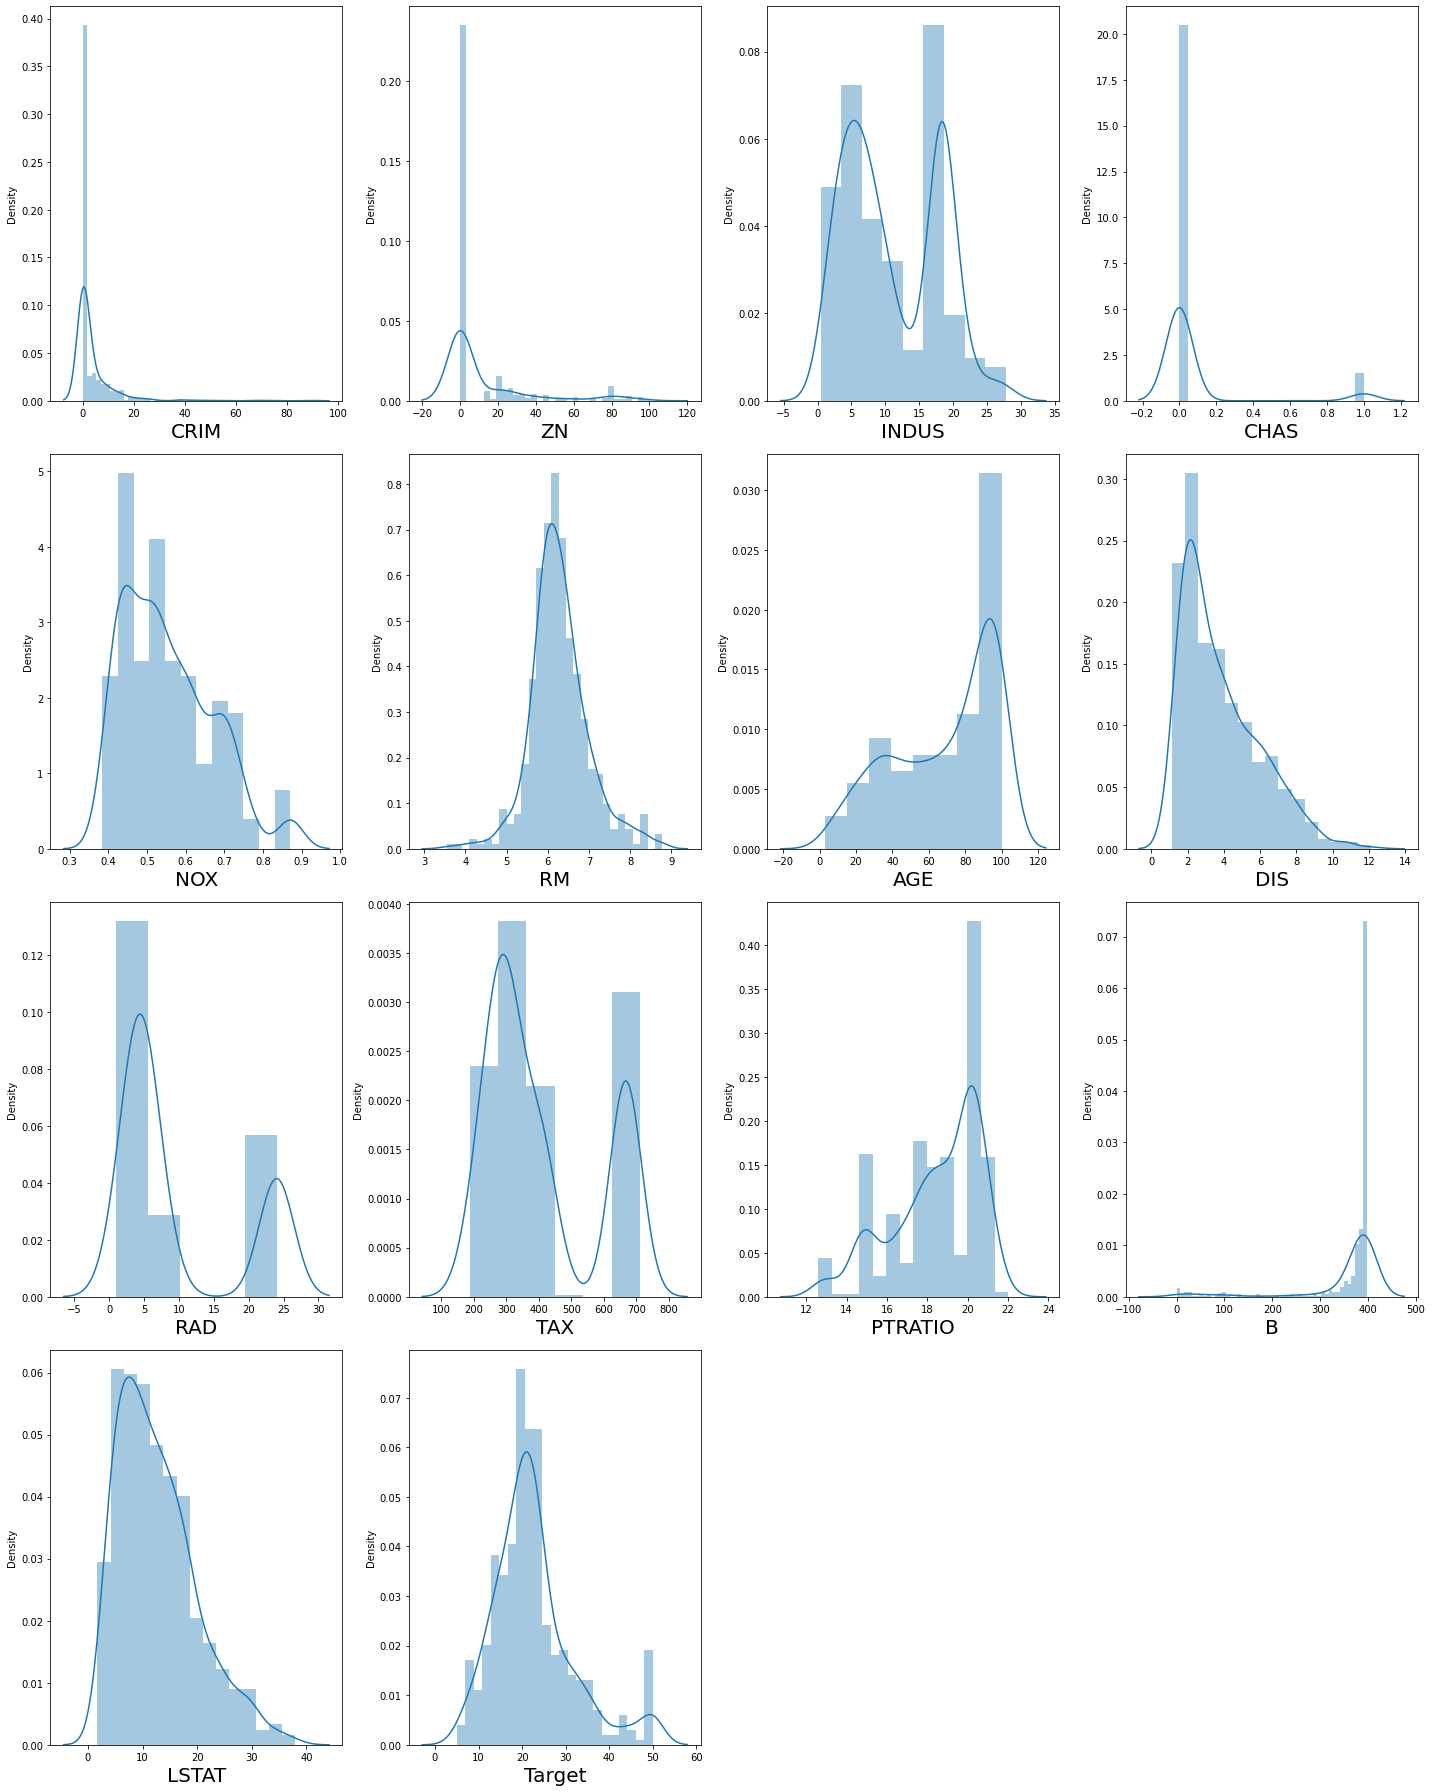

In [17]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in bos:
    if plotnumber<=14: 
        ax=plt.subplot(4,4,plotnumber)
        sns.distplot(bos[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [18]:
x = bos.drop(columns=['Target'])

In [19]:
x

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [20]:
y = bos['Target']

In [21]:
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: Target, Length: 506, dtype: float64

In [22]:
x.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

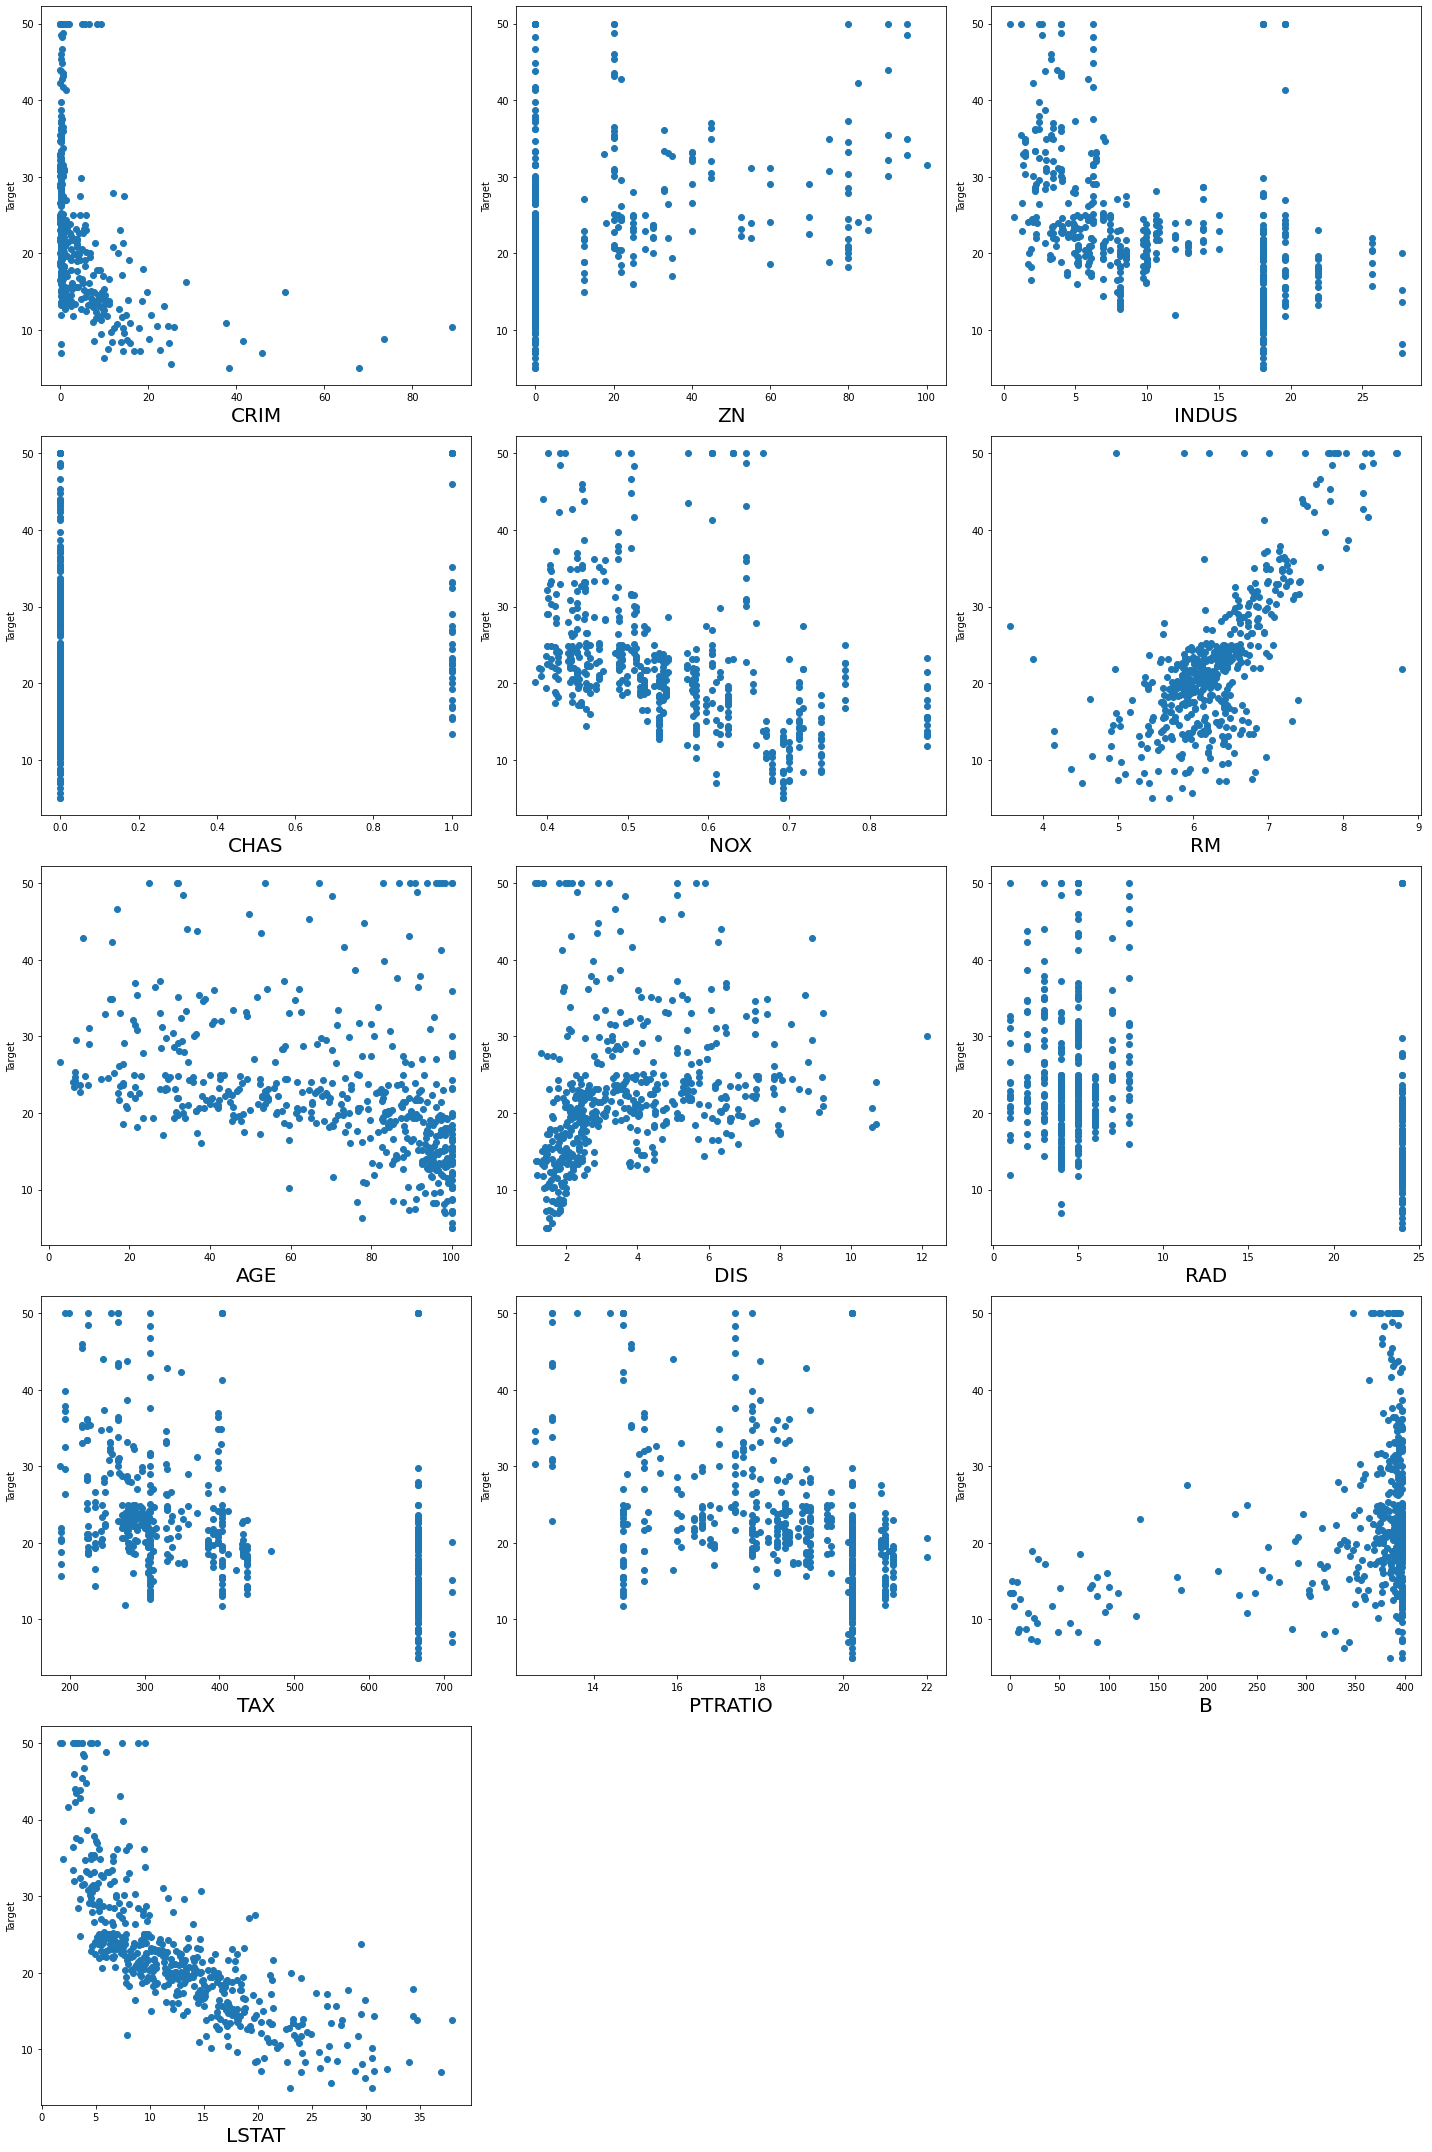

In [23]:
plt.figure(figsize=(20,30),facecolor='white')
plotnumber=1
for col in x:
    if plotnumber <=13:
        ax=plt.subplot(5,3,plotnumber)
        plt.scatter(x[col],y)
        plt.xlabel(col,fontsize=20)
        plt.ylabel('Target',fontsize=10)
    plotnumber+=1
plt.tight_layout()

In [24]:
scaler = StandardScaler()

In [25]:
x_scaled = scaler.fit_transform(x)

In [26]:
x_scaled

array([[-0.41978194,  0.28482986, -1.2879095 , ..., -1.45900038,
         0.44105193, -1.0755623 ],
       [-0.41733926, -0.48772236, -0.59338101, ..., -0.30309415,
         0.44105193, -0.49243937],
       [-0.41734159, -0.48772236, -0.59338101, ..., -0.30309415,
         0.39642699, -1.2087274 ],
       ...,
       [-0.41344658, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.98304761],
       [-0.40776407, -0.48772236,  0.11573841, ...,  1.17646583,
         0.4032249 , -0.86530163],
       [-0.41500016, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.66905833]])

In [27]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [28]:
variables = x_scaled
vif=pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(variables,i) for i in range(variables.shape[1])]
vif['Features'] = x.columns

In [29]:
vif

,VIF,Features
0,1.792192,CRIM
1,2.298758,ZN
2,3.991596,INDUS
3,1.073995,CHAS
4,4.393720,NOX
5,1.933744,RM
6,3.100826,AGE
7,3.955945,DIS
8,7.484496,RAD
9,9.008554,TAX


In [30]:
x = bos.drop(columns=['Target','RAD','TAX'])

In [31]:
y = bos['Target']

In [32]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
variables = x_scaled
vif=pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(variables,i) for i in range(variables.shape[1])]
vif['Features'] = x.columns

In [33]:
vif

,VIF,Features
0,1.478206,CRIM
1,2.154483,ZN
2,3.179166,INDUS
3,1.057805,CHAS
4,3.901348,NOX
5,1.872532,RM
6,3.075755,AGE
7,3.954443,DIS
8,1.496077,PTRATIO
9,1.316559,B


In [34]:
from sklearn.tree import  DecisionTreeClassifier, export_graphviz

In [35]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size = 0.25,random_state = 355)

In [36]:
from sklearn.ensemble import RandomForestRegressor

In [37]:
Random_clf = RandomForestRegressor(n_estimators=50,random_state=0)

In [38]:
Random_clf.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=50, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [39]:
y_pred = Random_clf.predict(x_test)

In [40]:
y_pred

array([14.262, 16.59 , 29.486, 20.868,  9.298, 21.612, 22.608, 18.326,
       45.598, 15.07 , 21.318, 22.15 , 21.308, 19.244,  9.506, 31.606,
       20.554, 19.55 , 23.206, 14.642, 19.166, 24.066, 34.308, 23.268,
       35.566, 22.692, 30.274, 35.298, 27.04 , 21.358, 22.684, 23.612,
       13.812, 21.18 , 15.532, 24.528, 42.948, 19.404, 26.126, 25.04 ,
       20.238, 14.642, 17.862, 15.586, 21.346, 19.68 , 23.932, 15.1  ,
       25.946, 17.258, 21.548, 18.674, 17.326, 34.8  , 46.926,  9.568,
       44.378, 24.584, 15.098, 21.59 , 17.962, 21.83 ,  8.928, 21.174,
       25.514, 10.74 , 23.23 , 30.216, 18.79 , 19.864, 15.568, 20.202,
       29.548, 17.596, 20.044, 45.862, 13.734, 15.09 , 20.58 , 16.03 ,
        9.43 , 18.944, 29.888, 19.904, 20.904, 34.906, 12.71 , 16.776,
       14.962, 30.584, 23.95 , 20.522, 33.198, 26.302, 14.488, 24.188,
       19.614, 19.25 , 33.844, 24.004, 14.19 , 31.128, 14.552, 22.846,
       21.44 , 14.424, 34.226, 15.616, 20.884, 20.228, 21.93 , 47.954,
      

In [41]:
Random_clf.score(x_train,y_train)

0.9814010495282246

In [42]:
Random_clf.score(x_test,y_test)

0.8645844637395887

In [50]:
grid_param = {
    "n_estimators" : [90,100,115,130],
    'criterion': ["mse", "mae"],
    'max_depth' : range(2,20,1),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1),
    'max_features' : ['auto','log2']
}

In [51]:
grid_search = GridSearchCV(estimator=Random_clf,param_grid=grid_param,cv=5,n_jobs=-1,verbose=3)

In [52]:
grid_search.fit(x_train,y_train)

Fitting 5 folds for each of 20736 candidates, totalling 103680 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 336 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:    6.1s
[Parallel(n_jobs=-1)]: Done 1360 tasks      | elapsed:   10.3s
[Parallel(n_jobs=-1)]: Done 2064 tasks      | elapsed:   14.9s
[Parallel(n_jobs=-1)]: Done 2896 tasks      | elapsed:   20.5s
[Parallel(n_jobs=-1)]: Done 3856 tasks      | elapsed:   27.8s
[Parallel(n_jobs=-1)]: Done 4944 tasks      | elapsed:   35.5s
[Parallel(n_jobs=-1)]: Done 6160 tasks      | elapsed:   44.3s
[Parallel(n_jobs=-1)]: Done 7504 tasks      | elapsed:   54.9s
[Parallel(n_jobs=-1)]: Done 8976 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 10576 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 12304 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 14160 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 16144 tasks  

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=50, n_jobs=None,
                                             oob_score=False, random_state=0,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jobs=-

In [53]:
grid_search.best_params_

{'criterion': 'mae',
 'max_depth': 14,
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 115}

In [54]:
Random_clf = RandomForestRegressor(criterion = 'mse',max_depth = 14,max_features = 'log2',min_samples_leaf = 1,min_samples_split=2
                                 ,n_estimators=115,random_state=6)

In [55]:
Random_clf.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=14, max_features='log2', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=115, n_jobs=None, oob_score=False,
                      random_state=6, verbose=0, warm_start=False)

In [56]:
Random_clf.score(x_train,y_train)

0.9789672879935278

In [57]:
Random_clf.score(x_test,y_test)

0.8783821406212815

In [61]:
y_pred = Random_clf.predict(x_test)

In [62]:
y_pred

array([13.00900621, 17.27818864, 31.09565217, 21.29663128,  9.59673913,
       21.34729193, 21.56065217, 19.46554082, 42.60956522, 16.45118999,
       21.56667567, 21.79735401, 22.14139932, 19.27639657,  9.60304348,
       31.66869565, 20.12741968, 20.10612554, 23.50048532, 15.79810925,
       19.36913354, 24.06170168, 32.61453416, 22.95819255, 34.0626087 ,
       22.97026102, 29.75637681, 33.95826087, 26.83869565, 21.98118815,
       22.39898946, 23.76165302, 13.7826087 , 21.59804348, 16.3166087 ,
       25.07412008, 35.71217391, 18.68261468, 27.60658385, 26.67391304,
       20.25136198, 15.62847101, 18.80018036, 16.06915942, 21.67601637,
       20.05060474, 24.75017787, 15.24438302, 24.97126087, 17.33786092,
       22.59923188, 18.86277651, 17.46827458, 32.77043478, 44.99304348,
        9.58      , 43.81391304, 25.12967062, 16.22086308, 22.52127768,
       18.12677536, 21.80349886,  8.87830435, 20.8868044 , 26.18047101,
       11.36573913, 23.46810145, 27.82434783, 19.62759736, 19.39

In [66]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_auc_score,mean_absolute_error

In [68]:
from sklearn import metrics

In [69]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 2.3499508367874964
Mean Squared Error: 10.871929798639211
Root Mean Squared Error: 3.2972609539797135
